## Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

### Instructions
- Get the numerical variables from our dataset.
- Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
- Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

### Libraries

In [237]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import math

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Read the file

In [238]:
data =pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

#### Step 1 : Get the numerical variables from our dataset.

In [239]:
data_num = data.select_dtypes(include=[np.number])

In [240]:
data_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [241]:
data_num.shape

(9134, 8)

#### Step 2: Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

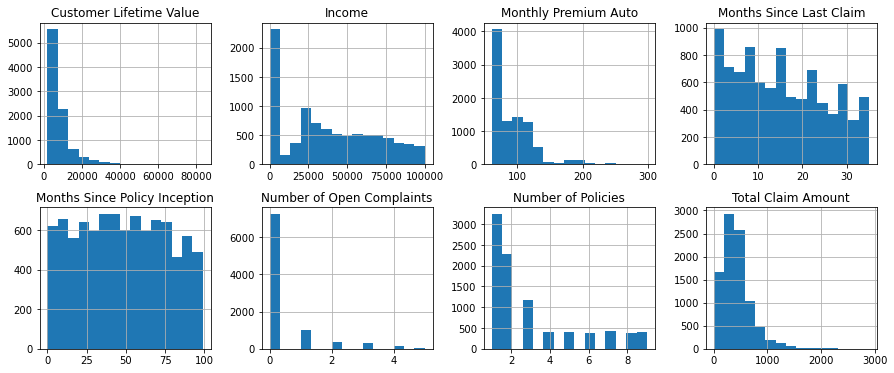

In [242]:
data_num.hist(bins=15, figsize=(15, 6), layout=(2, 4));

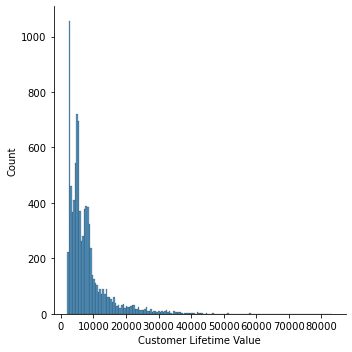

In [243]:
sns.displot(data['Customer Lifetime Value'])
plt.show()

-> no apparent pattern

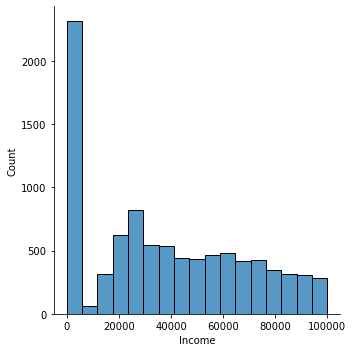

In [244]:
sns.displot(data['Income'])
plt.show()

-> positively skewed distribution

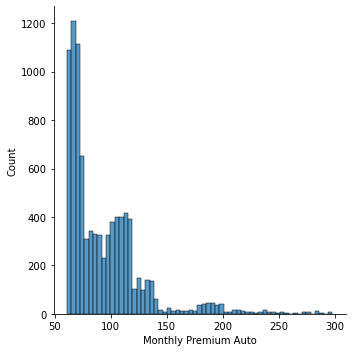

In [245]:
sns.displot(data['Monthly Premium Auto'])
plt.show()

-> positively skewed distribution

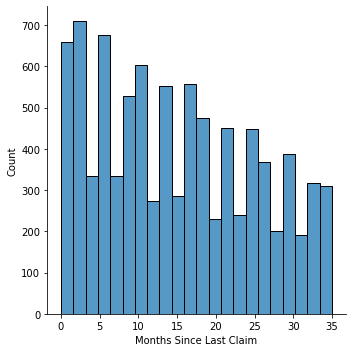

In [246]:
sns.displot(data['Months Since Last Claim'])
plt.show()

-> direction to positively skewed distribution

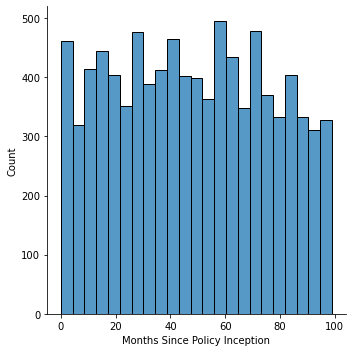

In [247]:
sns.displot(data['Months Since Policy Inception'])
plt.show()

-> uniform distribution

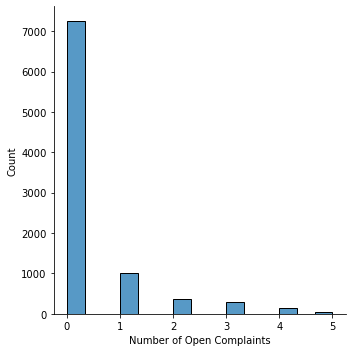

In [248]:
sns.displot(data['Number of Open Complaints'])
plt.show()

-> positively skewed distribution

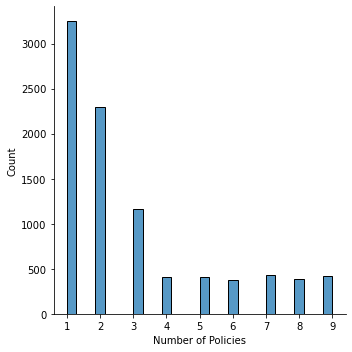

In [249]:
sns.displot(data['Number of Policies'])
plt.show()

-> positively skewed distribution

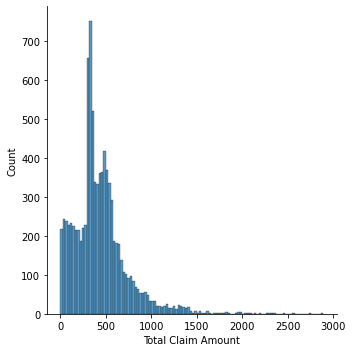

In [250]:
sns.displot(data['Total Claim Amount'])
plt.show()

-> no apparent pattern.

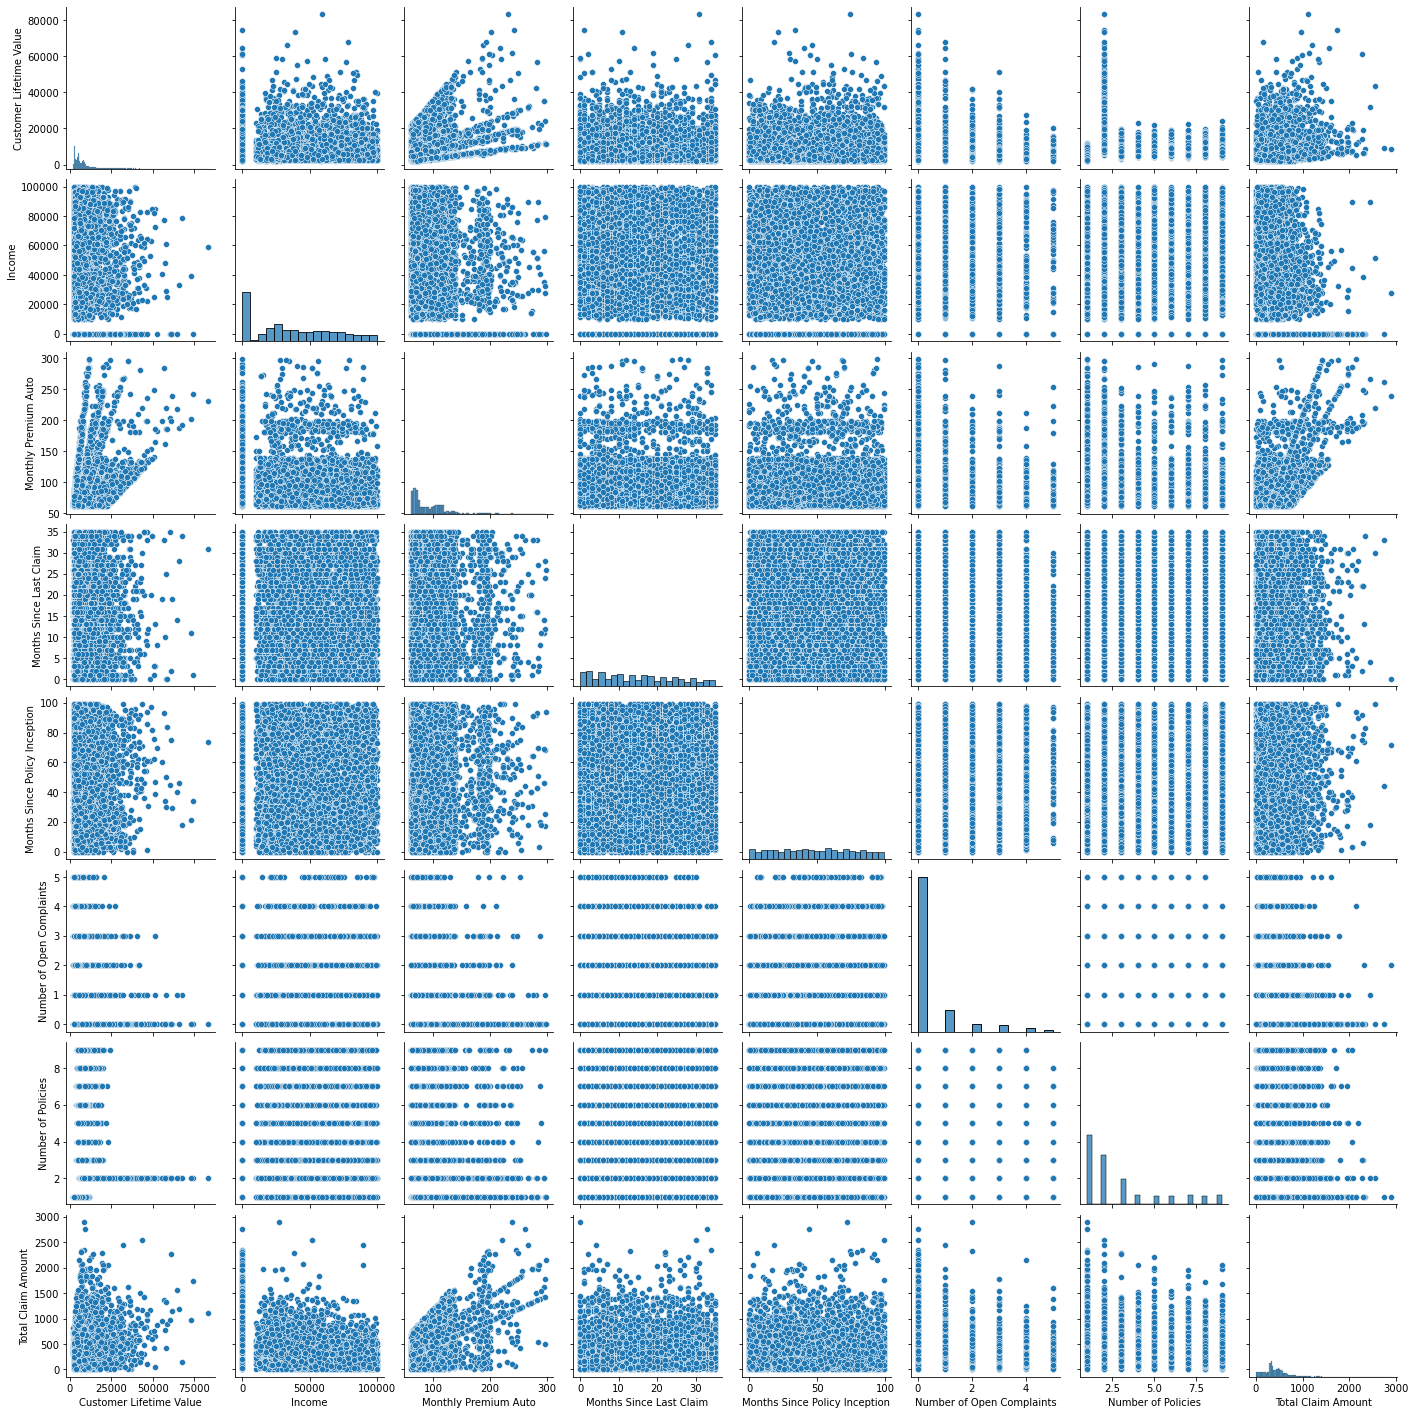

In [251]:
sns.pairplot(data_num)

#### My goal is to predict the total claim amount. I set all numerical variable in realtion to the total claim amount.

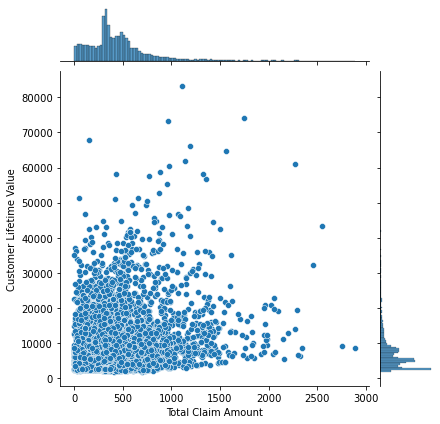

In [252]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Customer Lifetime Value'])

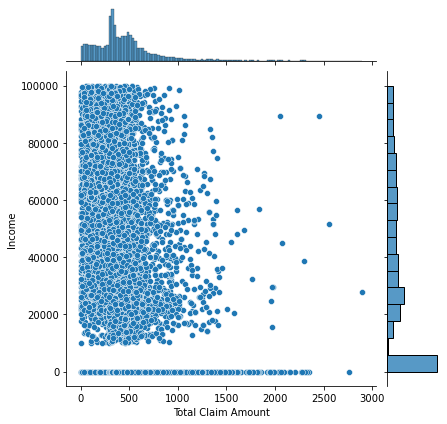

In [253]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Income'])

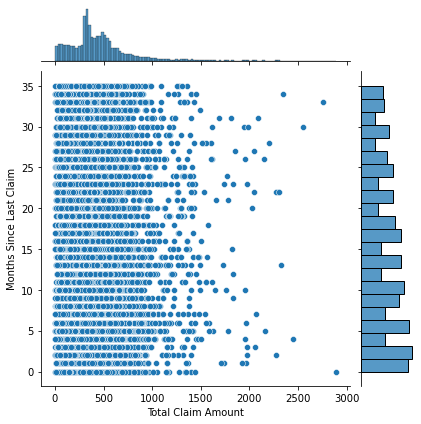

In [254]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Months Since Last Claim'])

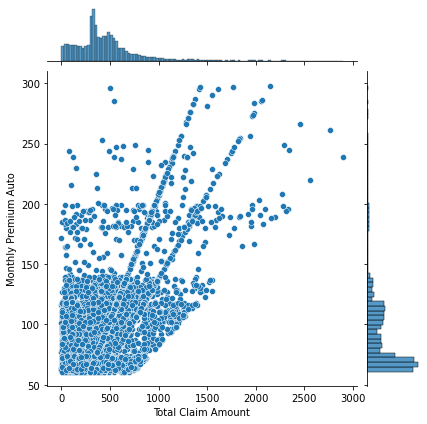

In [255]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Monthly Premium Auto'])

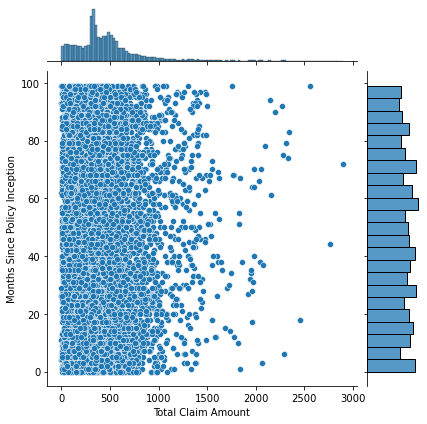

In [256]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Months Since Policy Inception'])

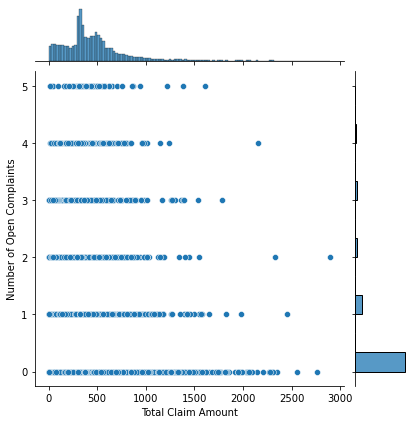

In [257]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Number of Open Complaints'])

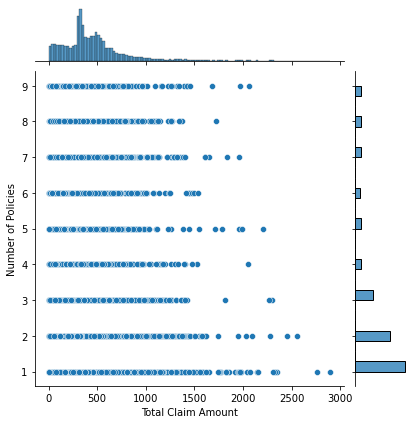

In [258]:
sns.jointplot(x=data_num['Total Claim Amount'], y=data_num['Number of Policies'])

Result:
- The plot Total Claim Amount to Number/ Open Complaints is familiar to the graph Total Claim Amount/Number of Policies.
-  The plot Total Claim Amount to Number/ Months Since Policy Inception is familiar to the graph Total Claim Amount/Income.

#### Step 3: Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

Column: customer lifetime value

1. Outliers

<AxesSubplot:xlabel='Customer Lifetime Value'>

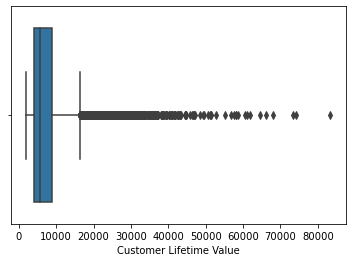

In [259]:
sns.boxplot(x=data['Customer Lifetime Value'])

Removing outliers

In [260]:
iqr = np.percentile(data['Customer Lifetime Value'],75) - np.percentile(data['Customer Lifetime Value'],25)
upper_limit = np.percentile(data['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(data['Customer Lifetime Value'],25) - 1.5*iqr

In [261]:
data = data[(data['Customer Lifetime Value']>lower_limit) & (data['Customer Lifetime Value']<upper_limit)]

<AxesSubplot:xlabel='Customer Lifetime Value'>

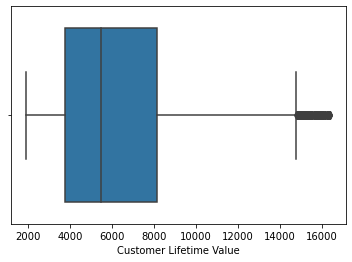

In [262]:
sns.boxplot(x=data['Customer Lifetime Value'])

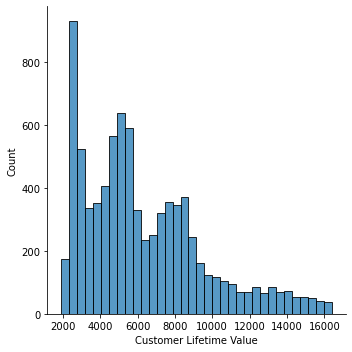

In [263]:
sns.displot(data['Customer Lifetime Value'])
plt.show()

-> The graph changed but it is not good enough.

2. Transformations based around scale of individual features

-> Log Transformation

In [264]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Customer Lifetime Value_log'] = list(map(log_transfom_clean_, data['Customer Lifetime Value']))

In [265]:
data['Customer Lifetime Value_log'] = data['Customer Lifetime Value_log'].fillna(np.mean(data['Customer Lifetime Value_log']))

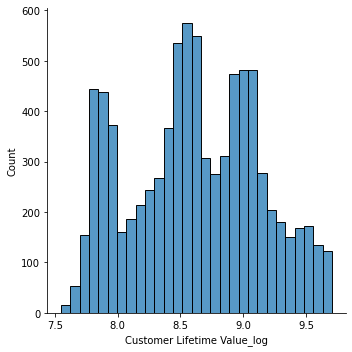

In [266]:
sns.displot(data['Customer Lifetime Value_log'])
plt.show()

Result: It stays a no apparent pattern distribution.

-> Box cox transformation

In [267]:
data['Customer Lifetime Value_'] = np.where(data['Customer Lifetime Value']<=0,0,data['Customer Lifetime Value'])
# now calculate mean of the new column , exluding zeros in the count 
mean = np.sum(data['Customer Lifetime Value_'])/len(data[data['Customer Lifetime Value_']>0])
data['Customer Lifetime Value_'] = data['Customer Lifetime Value_'].replace(0,mean)

In [268]:
data = data[(data['Customer Lifetime Value']>lower_limit) & (data['Customer Lifetime Value']<upper_limit)]


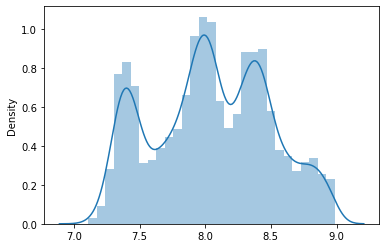

In [269]:
sns.distplot(xt)
plt.show()

Result: It stays a no apparent pattern distribution.

Column:'Income'

<AxesSubplot:xlabel='Income'>

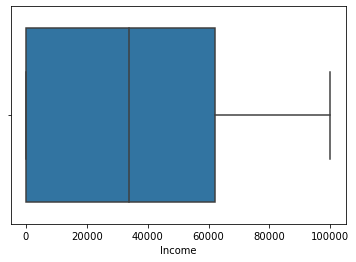

In [270]:
sns.boxplot(x=data['Income'])

Result: no outliers

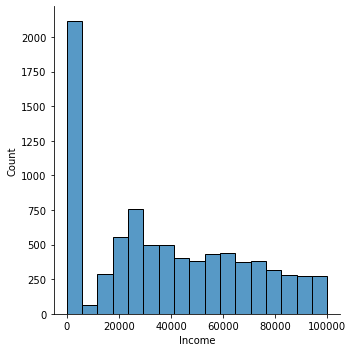

In [271]:
sns.displot(data['Income'])
plt.show()

2. Transformations based around scale of individual features

-> Log Transformation

In [272]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Income_log'] = list(map(log_transfom_clean_, data['Income']))

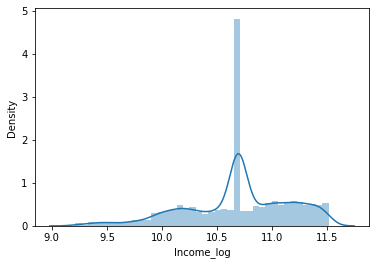

In [273]:
data['Income_log'] = data['Income_log'].fillna(np.mean(data['Income_log']))
sns.distplot(data['Income_log'])
plt.show()

-> Box cox transformation
No upper/lower limit because no outliers -> Box cox will not apply.

Column: 'Monthly Premium Auto'

<AxesSubplot:xlabel='Monthly Premium Auto'>

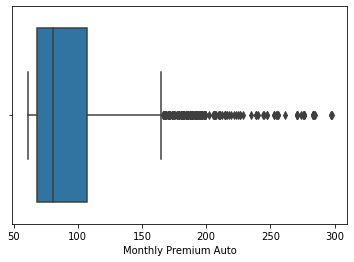

In [274]:
sns.boxplot(x=data['Monthly Premium Auto'])

Removing outliers

In [275]:
iqr1 = np.percentile(data['Monthly Premium Auto'],75) - np.percentile(data['Monthly Premium Auto'],25)
upper_limit1 = np.percentile(data['Monthly Premium Auto'],75) + 1.5*iqr1
lower_limit1 = np.percentile(data['Monthly Premium Auto'],25) - 1.5*iqr1

In [276]:
data = data[(data['Monthly Premium Auto']>lower_limit1) & (data['Monthly Premium Auto']<upper_limit1)]

<AxesSubplot:xlabel='Monthly Premium Auto'>

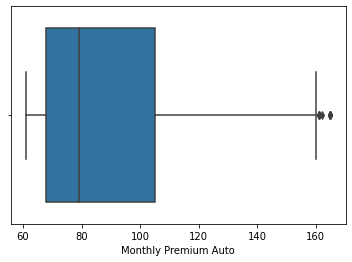

In [277]:
sns.boxplot(x=data['Monthly Premium Auto'])

<AxesSubplot:xlabel='Monthly Premium Auto'>

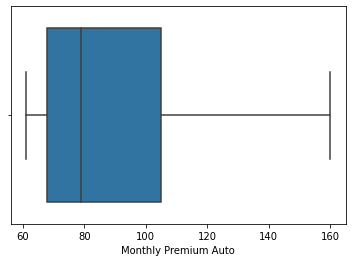

In [278]:
iqr1a = np.percentile(data['Monthly Premium Auto'],75) - np.percentile(data['Monthly Premium Auto'],25)
upper_limit1a = np.percentile(data['Monthly Premium Auto'],75) + 1.5*iqr1a
lower_limit1a = np.percentile(data['Monthly Premium Auto'],25) - 1.5*iqr1a
data = data[(data['Monthly Premium Auto']>lower_limit1a) & (data['Monthly Premium Auto']<upper_limit1a)]
sns.boxplot(x=data['Monthly Premium Auto'])

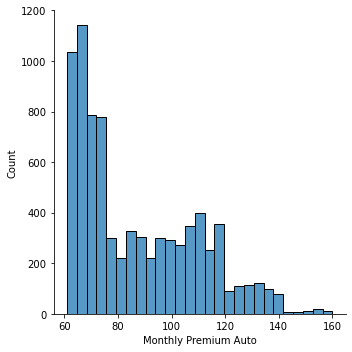

In [279]:
sns.displot(data['Monthly Premium Auto'])
plt.show()

2. Transformations based around scale of individual features

-> Log Transformation

In [280]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Monthly Premium Auto_log'] = list(map(log_transfom_clean_, data['Monthly Premium Auto']))

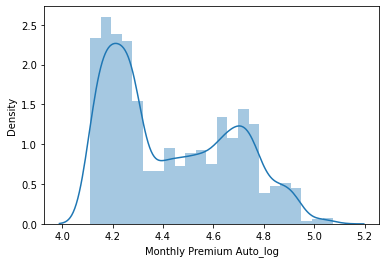

In [281]:
data['Monthly Premium Auto_log'] = data['Monthly Premium Auto_log'].fillna(np.mean(data['Monthly Premium Auto_log']))
sns.distplot(data['Monthly Premium Auto_log'])
plt.show()

-> Box cox transformation

In [282]:
data['Monthly Premium Auto_'] = np.where(data['Monthly Premium Auto']<=0,0,data['Monthly Premium Auto'])
mean_M = np.sum(data['Monthly Premium Auto_'])/len(data[data['Monthly Premium Auto_']>0])
data['Monthly Premium Auto_'] = data['Monthly Premium Auto_'].replace(0,mean_M)
xt1, lmbda = stats.boxcox(data['Monthly Premium Auto_'])

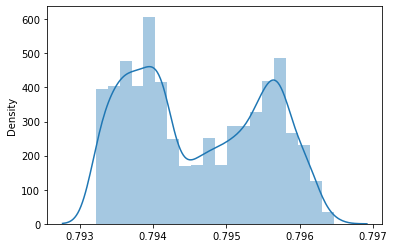

In [283]:
data = data[(data['Monthly Premium Auto']>lower_limit1a) & (data['Monthly Premium Auto']<upper_limit1a)]
sns.distplot(xt1)
plt.show()

Column: Months Since Last Claim

<AxesSubplot:xlabel='Months Since Last Claim'>

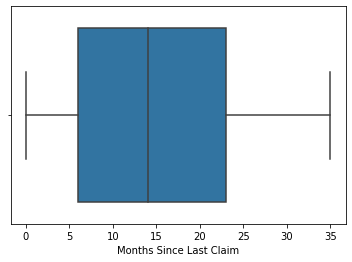

In [284]:
sns.boxplot(x=data['Months Since Last Claim'])

Result: no outliers

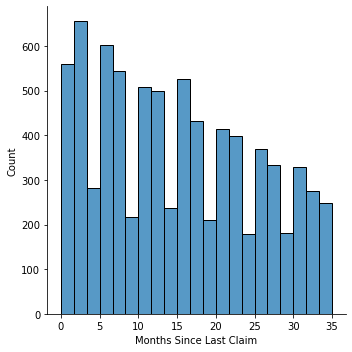

In [285]:
sns.displot(data['Months Since Last Claim'])
plt.show()

-> Log Transformation

In [286]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Months Since Last Claim_log'] = list(map(log_transfom_clean_, data['Months Since Last Claim']))

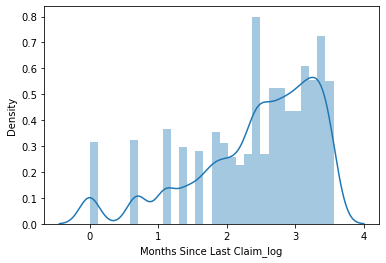

In [287]:
data['Months Since Last Claim_log'] = data['Months Since Last Claim_log'].fillna(np.mean(data['Months Since Last Claim_log']))
sns.distplot(data['Months Since Last Claim_log'])
plt.show()

-> Box cox transformation
No upper/lower limit because no outliers -> Box cox will not apply.

Column: Months Since Policy Inception

<AxesSubplot:xlabel='Months Since Policy Inception'>

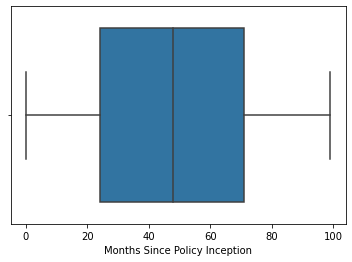

In [288]:
sns.boxplot(x=data['Months Since Policy Inception'])

Result: no outliers

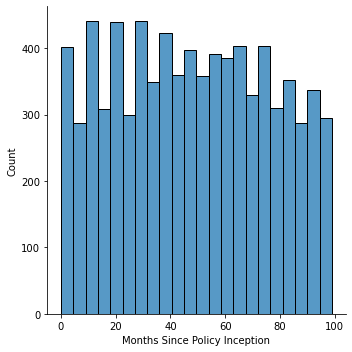

In [289]:
sns.displot(data['Months Since Policy Inception'])
plt.show()

-> Log Transformation

In [290]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Months Since Policy Inception_log'] = list(map(log_transfom_clean_, data['Months Since Policy Inception']))

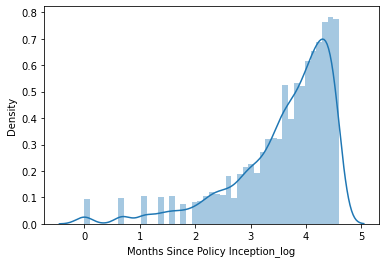

In [291]:
data['Months Since Policy Inception_log'] = data['Months Since Policy Inception_log'].fillna(np.mean(data['Months Since Policy Inception_log']))
sns.distplot(data['Months Since Policy Inception_log'])
plt.show()

-> Box cox transformation
No upper/lower limit because no outliers -> Box cox will not apply.

Column: Number of Open Complaints

<AxesSubplot:xlabel='Number of Open Complaints'>

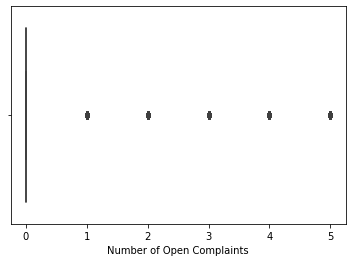

In [292]:
sns.boxplot(x=data['Number of Open Complaints'])

-> not really outliers

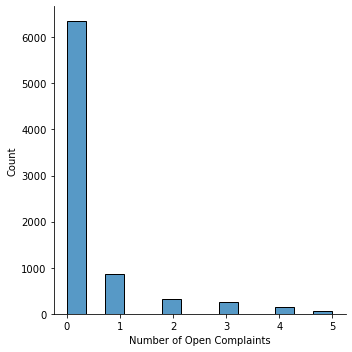

In [293]:
sns.displot(data['Number of Open Complaints'])
plt.show()

-> Log Transformation

In [294]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Number of Open Complaints_log'] = list(map(log_transfom_clean_, data['Number of Open Complaints']))

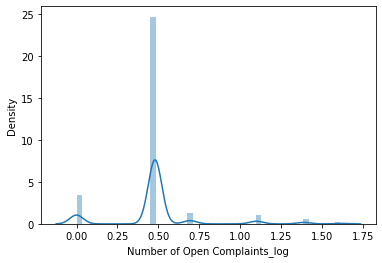

In [295]:
data['Number of Open Complaints_log'] = data['Number of Open Complaints_log'].fillna(np.mean(data['Number of Open Complaints_log']))
sns.distplot(data['Number of Open Complaints_log'])
plt.show()

-> Box cox transformation
No upper/lower limit because no outliers -> Box cox will not apply.

Column: Number of Policies

<AxesSubplot:xlabel='Number of Policies'>

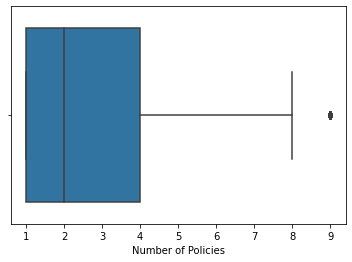

In [296]:
sns.boxplot(x=data['Number of Policies'])

Remove Outliers

<AxesSubplot:xlabel='Number of Policies'>

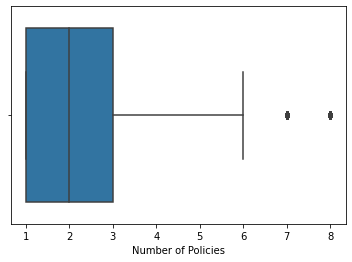

In [297]:
iqr3 = np.percentile(data['Number of Policies'],75) - np.percentile(data['Number of Policies'],25)
upper_limit3 = np.percentile(data['Number of Policies'],75) + 1.5*iqr3
lower_limit3 = np.percentile(data['Number of Policies'],25) - 1.5*iqr3
data = data[(data['Number of Policies']>lower_limit3) & (data['Number of Policies']<upper_limit3)]
sns.boxplot(x=data['Number of Policies'])

<AxesSubplot:xlabel='Number of Policies'>

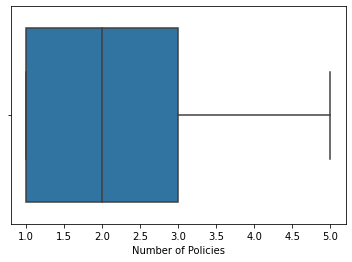

In [298]:
iqr4 = np.percentile(data['Number of Policies'],75) - np.percentile(data['Number of Policies'],25)
upper_limit4 = np.percentile(data['Number of Policies'],75) + 1.5*iqr4
lower_limit4 = np.percentile(data['Number of Policies'],25) - 1.5*iqr4
data = data[(data['Number of Policies']>lower_limit4) & (data['Number of Policies']<upper_limit4)]
sns.boxplot(x=data['Number of Policies'])

Result: no outliers

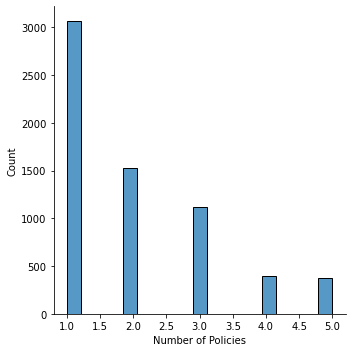

In [299]:
sns.displot(data['Number of Policies'])
plt.show()

-> Log Transformation

In [300]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Number of Policies_log'] = list(map(log_transfom_clean_, data['Number of Policies']))

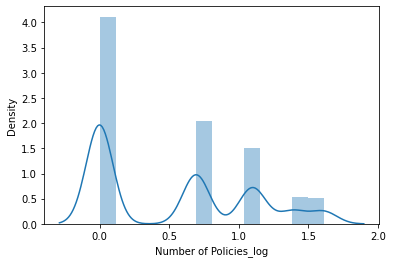

In [301]:
data['Number of Policies_log'] = data['Number of Policies_log'].fillna(np.mean(data['Number of Policies_log']))
sns.distplot(data['Number of Policies_log'])
plt.show()

-> Box cox transformation
No upper/lower limit because no outliers -> Box cox will not apply.

Column: Total Claim Amount -> that is our y variable

<AxesSubplot:xlabel='Total Claim Amount'>

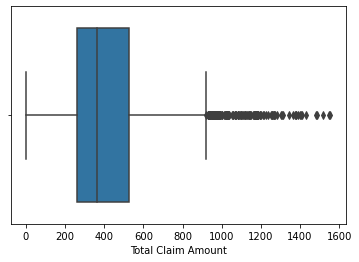

In [302]:
sns.boxplot(x=data['Total Claim Amount'])

<AxesSubplot:xlabel='Total Claim Amount'>

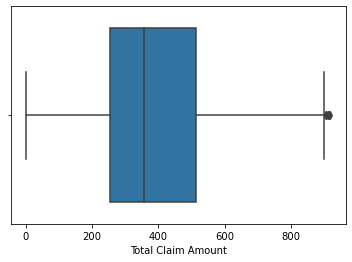

In [303]:
iqr6 = np.percentile(data['Total Claim Amount'],75) - np.percentile(data['Total Claim Amount'],25)
upper_limit6 = np.percentile(data['Total Claim Amount'],75) + 1.5*iqr6
lower_limit6 = np.percentile(data['Total Claim Amount'],25) - 1.5*iqr6
data = data[(data['Total Claim Amount']>lower_limit6) & (data['Total Claim Amount']<upper_limit6)]
sns.boxplot(x=data['Total Claim Amount'])

<AxesSubplot:xlabel='Total Claim Amount'>

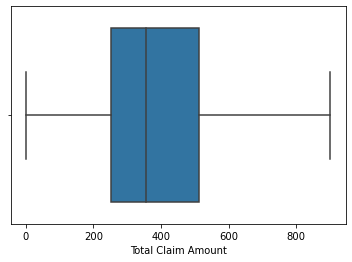

In [304]:
iqr6a = np.percentile(data['Total Claim Amount'],75) - np.percentile(data['Total Claim Amount'],25)
upper_limit6a = np.percentile(data['Total Claim Amount'],75) + 1.5*iqr6a
lower_limit6a = np.percentile(data['Total Claim Amount'],25) - 1.5*iqr6a
data = data[(data['Total Claim Amount']>lower_limit6a) & (data['Total Claim Amount']<upper_limit6a)]
sns.boxplot(x=data['Total Claim Amount'])

-> Log Transformation

In [305]:
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN
data['Total Claim Amount_log'] = list(map(log_transfom_clean_, data['Total Claim Amount']))

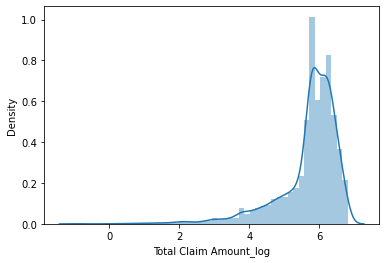

In [306]:
data['Total Claim Amount_log'] = data['Total Claim Amount_log'].fillna(np.mean(data['Total Claim Amount_log']))
sns.distplot(data['Total Claim Amount_log'])
plt.show()

-> Box cox transformation

In [307]:
data['Total Claim Amount_'] = np.where(data['Total Claim Amount']<=0,0,data['Total Claim Amount'])
# now calculate mean of the new column , exluding zeros in the count 
mean = np.sum(data['Total Claim Amount_'])/len(data[data['Total Claim Amount_']>0])
data['Total Claim Amount_'] = data['Total Claim Amount_'].replace(0,mean)

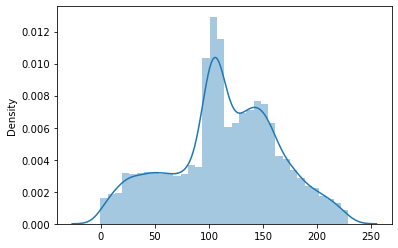

In [308]:
data = data[(data['Total Claim Amount']>lower_limit6a) & (data['Total Claim Amount']<upper_limit6a)]
xt6, lmbda = stats.boxcox(data['Total Claim Amount_'])
sns.distplot(xt6)
plt.show()